# Final Project

# Problem statement

CSE department has a teaching assistant (TA) who helps undergraduate students with their programming assignments during regular office hours. The TA’s office is rather small and has room for only one desk with a chair and computer. There are three chairs in the hallway outside the office where students can sit and wait if the TA is currently helping another student. When there are no students who need help during office hours, the TA sits at the desk and takes a nap. If a student arrives during office hours and finds the TA sleeping, the student must awaken the TA to ask for help. If a student arrives and finds the TA currently helping another student, the student sits on one of the chairs in the hallway and waits. If no chairs are available, the student will come back at a later time. Using POSIX threads, mutex locks, and semaphores, implement a solution that coordinates the activities of the TA and the student.

# Specs

## Functional Specs

Simulating an office hour period using threads.

### constrains

- The TA office has capacity for only 1 student
- The hallway has a capacity for only 3 students
- The TA takes nap whenever there are no students to help
- Students shall wake up the TA if he were asleep
- If the hallway is full whenever a student arrives he shall leave and come latter

# Problem Decomposition

## Modeling Wise

The problem falls loosely into the stochic simulation, precisely the M/G/1 queue; the students arrive to the office according to a Poisson process with rate of λ student/time, time required for students by the TA  i.i.d. random variables with mean τ and standard deviation σ time units. For sake of simplification the assumption that students arrive at a i.i.d. times is taken but realistically students are more likely to appear in groups whenever the is a gap time between lectures. The simulation is not concerned with the failure point of the system, therefore, estimators calculations are ignored. The main focus is on the implementation technique with threads.

i.i.d independent identically distributed

## Implementation Wise

The problem is a producer-consumer threading problem with a single consumer(TA) and FIFO service for producers

# References

[https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459](https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459)

[the inspection paradox](http://allendowney.blogspot.com/2015/08/the-inspection-paradox-is-everywhere.html)

[why my bus is always late](http://jakevdp.github.io/blog/2018/09/13/waiting-time-paradox/)

[concurrency primitives from scratch](https://isocpp.org/blog/2019/12/multithreading-101-concurrency-primitives-from-scratch-arvid-gerstmann-meet)

In [1]:
import numpy as np
import pandas as pd
from scipy.special import factorial

import matplotlib.pyplot as plt


np.random.seed(42)

plt.style.use('seaborn')
%matplotlib inline

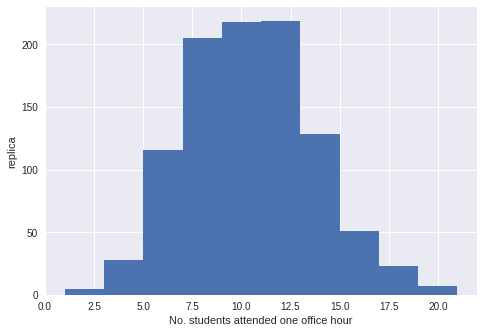

In [2]:
# we are expecting 20 students to show up during an office hour
# therefore expecting a single student to showup every 3 minutes

students_per_minute = 1/6

# we assuming a 2h office hour session
minutes = 60

# simulate 1000 office hours
lmbda = students_per_minute * minutes
xs = np.random.poisson(lmbda, 1000)

fig = plt.figure()
ax = fig.add_axes((0.5, 4,1, 1))

ax.hist(xs)

ax.set_xlabel('No. students attended one office hour')
_ = ax.set_ylabel('replica')

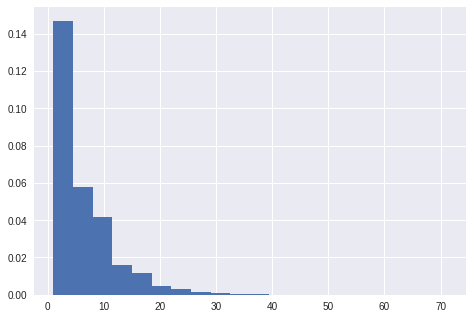

In [4]:
# intervals between students arrivals


x = np.diff(np.where(
    np.random.choice([0, 1], size = 100000, replace=True,
                      p=[1-students_per_minute, students_per_minute]) == 1)[0])
x.mean()

fig = plt.figure()
ax = fig.add_axes((0.5, 4, 1, 1))
_ = ax.hist(x, bins=20, density=True)


The most likely value is 9 with probability 0.1251


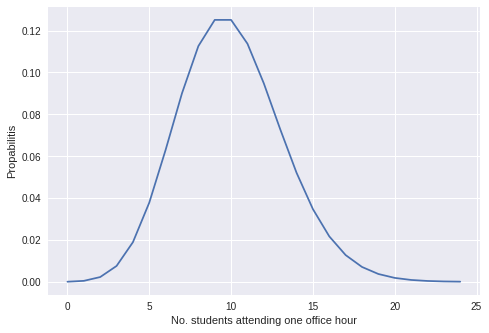

In [5]:
# probability of N of student attend one office hour

def calc_prob(events_per_minute, minutes, k):
    # Calculate probability of k events in specified number of minutes
    lam = events_per_minute * minutes
    return np.exp(-lam) * np.power(lam, k) / factorial(k)


ns = np.arange(25)
p_n = calc_prob(students_per_minute, minutes, ns)
print(f'The most likely value is {np.argmax(p_n)} with probability {np.max(p_n):.4f}')

fig =  plt.figure()
ax = fig.add_axes((0.5, 4, 1, 1))
ax.plot(ns, p_n)

ax.set_xlabel('No. students attending one office hour')
_ = ax.set_ylabel('Propabilitis')



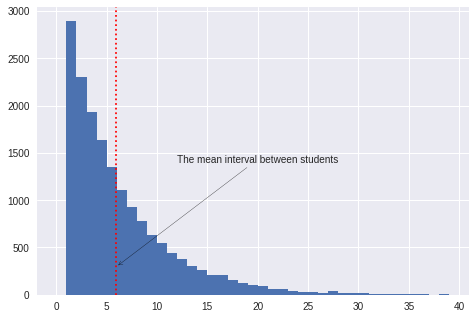

In [6]:
# intervals between students arrival

arrivals = np.random.choice([0, 1], size=100000, replace=True, p=[1-students_per_minute, students_per_minute])
success_time = np.where(arrivals == 1)[0]
waititng_time = np.diff(success_time)
np.mean(waititng_time)

fig = plt.figure()
ax = fig.add_axes((0.5, 4, 1, 1))
ax.axvline(waititng_time.mean(), color='red', linestyle='dotted')
ax.annotate(
    'The mean interval between students',
    xy=(6, 300), arrowprops=dict(arrowstyle='->'), xytext=(12, 1400))
hist = ax.hist(waititng_time, bins=np.arange(40))


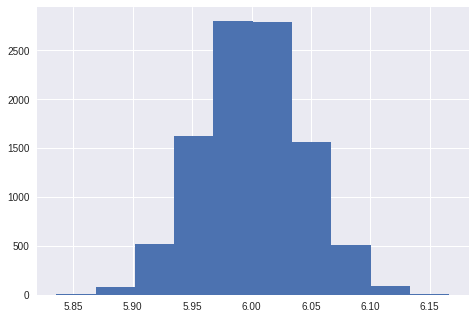

In [7]:
# average waiting time between students

avg = [np.mean(np.diff(np.where(
                       np.random.choice([0, 1], size = 100000,replace=True,
                       p=[1-students_per_minute, students_per_minute]) == 1)[0]))
       for _ in range(10000)]

fig = plt.figure()
ax = fig.add_axes((0.5, 4, 1, 1))
hist = ax.hist(avg)

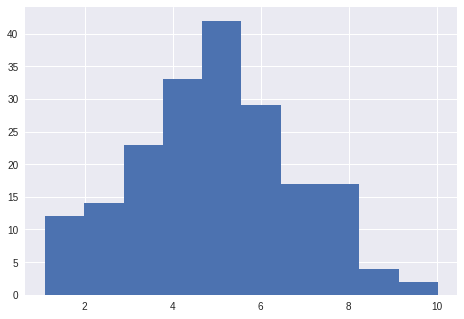

In [8]:
# normal disribution for time intevals spent with each student

arr = np.random.normal(loc=5, scale=2, size=200)
arr = arr[arr >= 1]

fig = plt.figure()
ax = fig.add_axes((0.5, 4, 1, 1))
hist = ax.hist(arr)